<a href="https://colab.research.google.com/github/JASCRAJ/Sketch-literature/blob/main/160224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
import xml.etree.ElementTree as ET

def sort_and_save_by_color(svg_path):
    tree = ET.parse(svg_path)
    root = tree.getroot()
    svg_width = root.get('width')
    svg_height = root.get('height')

    # Dictionary to store paths grouped by color
    paths_by_color = {}

    # Iterate through each <path> element
    for path in root.findall(".//path"):
        style = path.get("style")
        color = style.split(";")[0].split(":")[1]

        # Add the path to the corresponding color group
        if color not in paths_by_color:
            paths_by_color[color] = []
        paths_by_color[color].append(path)

    # Create a new SVG file for each color group
    for color, paths in paths_by_color.items():
        new_svg = ET.Element("svg", xmlns="http://www.w3.org/2000/svg", version="1.1", width=svg_width, height=svg_height)
        new_svg.extend(paths)

        # Save the new SVG file with the color in the filename
        output_file_path = f"/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_master-output_{color}.svg"
        ET.ElementTree(new_svg).write(output_file_path)

        print(f"Saved {len(paths)} paths with color {color} to {output_file_path}")

# Replace '/content/d7597_sketch_2_c_4.svg' with the actual path to your SVG file
sort_and_save_by_color('/content/Munch-J_47093_Munch_master.svg')


FileNotFoundError: [Errno 2] No such file or directory: '/content/Munch-J_47093_Munch_master.svg'

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

def parse_svg(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Extract width and height attributes from the SVG root element
    svg_width = root.get('width')
    svg_height = root.get('height')

    paths = []

    # Iterate through path elements
    for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
        path_data = path_elem.get('d')
        style = path_elem.get('style')

        # Extract numeric values from path_data using the custom function
        numeric_values = extract_numeric_values(path_data)

        # Extract the second and third elements
        M_x = numeric_values[0] if len(numeric_values) > 1 else None
        M_y = numeric_values[1] if len(numeric_values) > 2 else None

        # Calculate the length of the path data
        path_length = len(path_data)

        paths.append({
            'path_data': path_data,
            'style': style,
            'X_value': M_x,
            'Y_value': M_y,
            'path_length': path_length  # Add path length to the dictionary
        })

    # Create DataFrame from paths list
    df = pd.DataFrame(paths)

    # Add width and height to the DataFrame
    df['width'] = svg_width
    df['height'] = svg_height

    # Sort DataFrame based on 'path_length' in descending order
    df.sort_values(by='path_length', ascending=False, inplace=True)

    return df

def save_to_csv(dataframe, csv_filename):
    dataframe.to_csv(csv_filename, index=False)

# Replace '/content/Laura_sketch_1 (12).svg' with the actual path to your SVG file
#svg_file_path = '/content/Munch-unnamed_sketch_1 (1).svg'
svg_file_path = '/content/AAAI_dog_fc.svg'
# Parse SVG paths and create a DataFrame
df = parse_svg(svg_file_path)
print(len(df))
print(df.head(10))
#range = 700
range=300
# Split DataFrame based on path_length condition
subset_path_length_gt_2000 = df.iloc[1:4]
subset_path_length_le_2000 = df.iloc[4:]

# Replace 'subset_path_length_gt_2000.csv' and 'subset_path_length_le_2000.csv' with desired filenames
save_to_csv(subset_path_length_gt_2000, '/content/drive/MyDrive/060224_input/160224/Munch_download_/AAAI_dog_fc-subset_path_length_gt_2000.csv')
save_to_csv(subset_path_length_le_2000, '/content/drive/MyDrive/060224_input/160224/Munch_download_/AAAI_dog_fc-subset_path_length_lt_2000.csv')


1318
                                             path_data  \
588  M53 144C53 148.476 52.1377 154.784 49 154C48.0...   
830  M119 191C119.124 196.277 121.007 200.206 123 2...   
352  M215 109L207 109L207 111C211.094 112.153 214.2...   
705  M224 165C223.776 166.684 223.782 167.313 224 1...   
586  M419 143C412.236 154.498 400.846 169.367 399 1...   
589  M133 144C136.568 153.23 136.31 163.401 134 173...   
14   M235 5C235.768 6.31421 235.686 6.23209 237 7L2...   
399  M276 109L273 122L272 122C272.359 119.489 272.4...   
419  M174 119C176.877 118.524 179.137 118.438 182 1...   
698  M330 168C333.291 169.145 335.525 169.556 339 1...   

                          style X_value Y_value  path_length width height  
588  fill:#8b6a40; stroke:none;      53     144         2046   453    311  
830  fill:#715636; stroke:none;     119     191         2025   453    311  
352  fill:#b19166; stroke:none;     215     109         1628   453    311  
705  fill:#af916b; stroke:none;     224     165     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
common_path = '/content/drive/MyDrive/060224_input/160224/Munch_download_'
File_name = 'AAAI_dog_fc'
#dist = int(df['width'][0]) / 8
dist=10

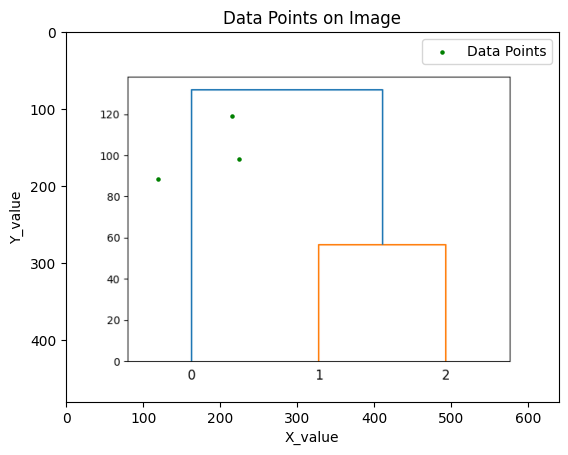

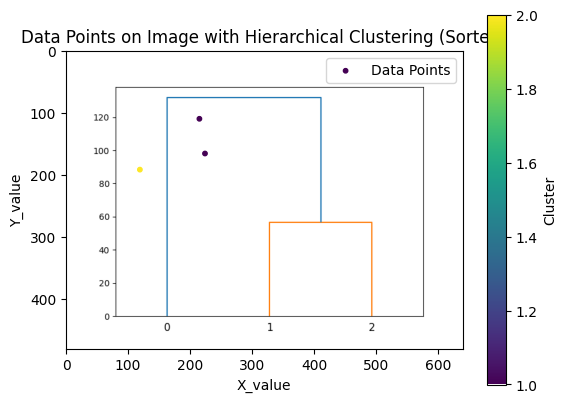

Number of clusters: 2


NameError: name 'svg_file_path' is not defined

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist
import cairosvg


def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=5)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()

def hierarchical_clustering(csv_file_path, image_file_path, max_distance=dist):
    df = pd.read_csv(csv_file_path)
    distances = pdist(df[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
    df['Cluster'] = clusters
    df_sorted = df.sort_values(by='Cluster')
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)
    return df_sorted

def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    width = root.attrib.get('width')
    height = root.attrib.get('height')
    return width, height


def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    cumulative_svg_content += f'<rect width="{width}" height="{height}" fill="white"/>\n'
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        #styles = group['style'].tolist()
        styles = group['style'].tolist()

        svg_content = ''

        for path_data, style in zip(paths_data, styles):
            #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'
            svg_content += f'<path d="{path_data}" style="{style}" />\n'
            #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'

        cumulative_svg_content += svg_content
        f_content_gt = cumulative_svg_content + '</svg>'

        svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_1_{cluster}.svg')
        with open(svg_file_path, 'w') as f:
            f.write(f_content_gt)

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_1_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)
    return cumulative_svg_content
    #print(cumulative_svg_content)

# Example usage:
# Define common path
# common_path = '/content/drive/MyDrive/060224_input/160224/Munch_download_'
# File_name = 'Munch-unnamed_sketch_1'

# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '-subset_path_length_gt_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
p_data = save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#print(p_data)
#save_svg_and_png_files(df_sorted, svg_output_dir)


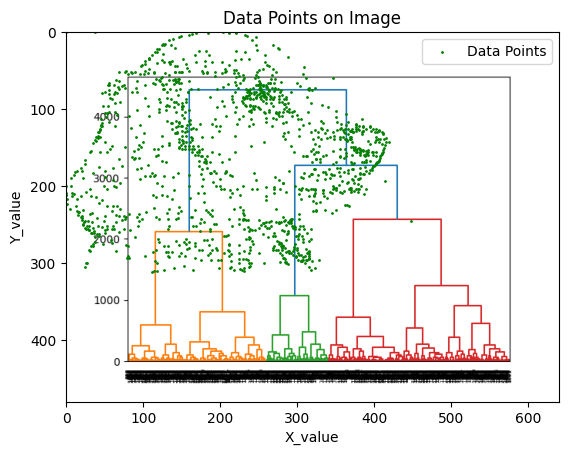

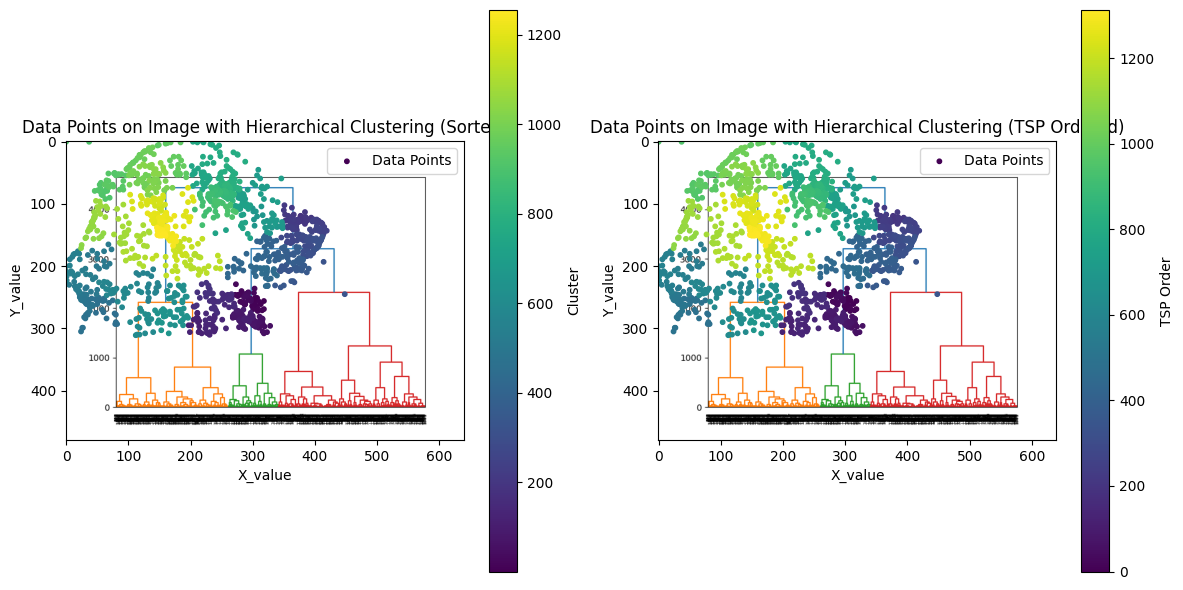

Number of clusters: 1255
                                              path_data  \
0     M318 256C315.979 256.881 314.146 257.496 312 2...   
1     M313 261C312.316 262.58 312.195 262.777 311 26...   
2     M304 251C304.788 253.985 305.721 255.906 308 2...   
3     M307 251L307 252C308.673 253.446 310.101 254.9...   
4     M303 256C305.649 264.942 309.079 269.317 309 2...   
...                                                 ...   
1309  M150 151C148.254 155.87 147.651 159.853 148 16...   
1310  M154 151L157 156L158 156C157.188 153.218 156.5...   
1311  M154 148L158 148C156.722 145.102 154.75 144.51...   
1312  M159 148C158.66 150.018 158.677 150.968 159 15...   
1313  M160 151L159 156L162 155C161.489 153.048 161.2...   

                           style  X_value  Y_value  path_length  width  \
0     fill:#e6e0d9; stroke:none;    318.0    256.0          351    453   
1     fill:#cec5b8; stroke:none;    313.0    261.0          134    453   
2     fill:#b5a895; stroke:none;    304.0   

NameError: name 'svg_file_path' is not defined

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial import distance_matrix
from scipy.optimize import linear_sum_assignment
import cairosvg



def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=1)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()


def hierarchical_clustering(csv_file_path, image_file_path, max_distance=dist):
    # Read data from CSV
    df = pd.read_csv(csv_file_path)

    # Perform hierarchical clustering
    distances = pdist(df[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
    df['Cluster'] = clusters

    # Sort DataFrame by cluster
    df_sorted = df.sort_values(by='Cluster')
    # Read image
    img = mpimg.imread(image_file_path)

    # Plot before TSP
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()


    # Calculate mean coordinates for each cluster
    grouped_means = df_sorted.groupby('Cluster')[['X_value', 'Y_value']].mean().reset_index()
    df_sorted = pd.merge(df_sorted, grouped_means, on='Cluster', suffixes=('', '_mean'))

    # Convert mean values to coordinates
    coordinates = df_sorted[['X_value_mean', 'Y_value_mean']].values.tolist()

    # Calculate distance matrix between coordinates
    dist_matrix = distance_matrix(coordinates, coordinates)
    row_ind, col_ind = linear_sum_assignment(dist_matrix)
    tsp_path = [coordinates[i] for i in col_ind]

    # Reorder DataFrame based on TSP path
    df_sorted['TSP_Order'] = col_ind
    df_sorted = df_sorted.sort_values('TSP_Order').reset_index(drop=True)

    # Save TSP ordered DataFrame
    df_sorted.to_csv('TSP_Order.csv', index=False)


    # Plot after TSP
    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['TSP_Order'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (TSP Ordered)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='TSP Order')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print number of clusters
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)

    return df_sorted

# def hierarchical_clustering_center_first(csv_file_path, image_file_path, max_distance=dist):
#     # Read data from CSV
#     df = pd.read_csv(csv_file_path)

#     # Calculate center point
#     center_x = df['X_value'].mean()
#     center_y = df['Y_value'].mean()

#     # Calculate distances from center
#     df['Distance'] = np.sqrt((df['X_value'] - center_x)**2 + (df['Y_value'] - center_y)**2)

#     # Sort data by distance from center
#     df_sorted = df.sort_values(by='Distance')

#     # Perform hierarchical clustering
#     distances = pdist(df_sorted[['X_value', 'Y_value']])
#     linkage_matrix = linkage(distances, method='ward')
#     clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

#     # Assign clusters to DataFrame
#     df_sorted['Cluster'] = clusters

#     # Visualize clustered data
#     img = mpimg.imread(image_file_path)
#     plt.imshow(img, cmap='gray')
#     plt.scatter(clusters['X_value'], clusters['Y_value'], c=clusters['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
#     plt.title('Data Points on Image with Hierarchical Clustering (Center First)')
#     plt.xlabel('X_value')
#     plt.ylabel('Y_value')
#     plt.colorbar(label='Cluster')
#     plt.legend()
#     plt.show()

#     # Print number of clusters
#     num_clusters = len(set(clusters))
#     print("Number of clusters:", num_clusters)

#     return df_sorted


def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    width = root.attrib.get('width')
    height = root.attrib.get('height')
    return width, height



def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    #cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    cumulative_svg_content = p_data
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        styles = group['style'].tolist()

        svg_content = ''

        for path_data, style in zip(paths_data, styles):
            svg_content += f'<path d="{path_data}" style="{style}" />\n'
            #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'

        cumulative_svg_content += svg_content
        f_content = cumulative_svg_content + '</svg>'

        svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_2_{cluster}.svg')
        with open(svg_file_path, 'w') as f:
            f.write(f_content)

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_2_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)




# Example usage:
# Define common path


# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '-subset_path_length_lt_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted_lt.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files_lt')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
print(df_sorted)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#save_svg_and_png_files(df_sorted, svg_output_dir)


In [ ]:
import os
import re
from PIL import Image

def generate_gif(input_folder, output_gif, duration):
    # Get list of image files in the input folder
    images = [img for img in os.listdir(input_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # Sort images based on filename (assuming filenames are numbered)
    images.sort(key=lambda x: int(re.search(r'\d+', x).group()))

    # Open each image and append it to frames list
    frames = []
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        frames.append(Image.open(image_path))

    # Save frames as GIF with specified duration between frames
    frames[0].save(output_gif, format='GIF', append_images=frames[1:], save_all=True, duration=duration, loop=0)

    print("GIF generated successfully.")

# Example usage
input_folder = png_output_dir#"/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_masterpng_files"
output_gif = File_name+".gif"
duration = 300  # in milliseconds (3 seconds)
generate_gif(input_folder, output_gif, duration)


GIF generated successfully.


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load pre-trained ResNet-50 model
resnet = models.resnet50(pretrained=True)
resnet.eval()

# Define image transformations
preprocess = transforms.Compose([
    transforms.ToTensor(),
])

# Load and preprocess images
image1 = Image.open("/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_masterpng_files/accumulated_clusters_1_2.png").convert('RGB')
#image1 = Image.open("/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-images_sketch_1png_files/accumulated_clusters_1_1.png").convert('RGB')
image2 = Image.open("/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_master.png").convert('RGB')
image1_tensor = preprocess(image1).unsqueeze(0)
image2_tensor = preprocess(image2).unsqueeze(0)

# Extract features
with torch.no_grad():
    features1 = resnet(image1_tensor)
    features2 = resnet(image2_tensor)

# Calculate cosine similarity
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
similarity = cos(features1, features2)
print("Cosine Similarity:", similarity.item())
